# Thermal Mitigation of Stormwater Management Pond Outflows Using Geothermal Cooling
## Analysis and Data
Erik Janssen  
07/16/2021

# 1 Introduction
This notebook contains the analysis for the article "Thermal Mitigation of Stormwater Management Pond Outflows Using Geothermal Cooling" published in the Journal of Water Management Modeling (2021). Equations, derivations, and further description is provided in the article, which is available at https://www.chijournal.org/.

# 2 Import Libraries

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from datetime import datetime, date, time,timedelta
import math
from scipy import optimize as optimize 
from matplotlib.dates import DateFormatter

#Define some parameters for plotting
myFmt = DateFormatter("%m/%d") 
fsize = 14
step_blue = "#00a3af"
step_gold = "#f8a81d"


# 3 Initial Sizing
The preliminary sizing solved the system model for the storm water heat exchange length (L_SHX) using assumption for all other parameters.

In [3]:
# Preliminary System Sizing
# Need a function to solve for SHX
# Note that in this notebook "swhe" is sometime used interchangeably with "SHX" and "bore" with "GHX"

def LSHX(T_g,T_p1,T_p2,flow_p,flow_h,R_swhe,R_bore,L_bore):
    # Define constants
    rho_p = 1000 # kg /m3; Density of water
    cap_p = 4186 # J / (Kg C); Specific heat capacity of stormwater
    rho_h = 1000 # kg /m3; Density of hydronic system heat transfer fluid
    cap_h = 4186 # J / (Kg C); Specific heat capacity of hydronic system heat transfer fluid
    
    # Convert values in lps and lpm to m3/s
    flow_p = flow_p*(1/1000) #lps to m3/s
    flow_h = flow_h*(1/60)*(1/1000) #lpm to m3/s

    # Solve for q
    q = rho_p * flow_p * cap_p * (T_p1 - T_p2) # Equation 10 in the article
        
    # Solve for Th2
    if flow_h > 0:
        T_h2 = q * R_bore / L_bore + q /(2 * rho_h * flow_h * cap_h) + T_g # Equation 7 in the article
    else:
        L_swhe = 0
        return L_swhe
        
    # Solve for Th1 
    T_h1 = T_h2 - q / (rho_h * flow_h * cap_h) # Equation 6 in the article
    if T_h1 < T_g: #supply can't be cooler than ground itself...
        L_swhe = 0
        return L_swhe
       
    # Solve for LMTD
    ln_numer = (T_p1 + T_p2)/2 - T_h2
    ln_denom = (T_p1 + T_p2)/2 - T_h1
    rat_numer = ln_numer - ln_denom
    if (ln_denom < 0.1) | (ln_numer < 0.1):
        L_swhe = 0
        return L_swhe
    else:
        LMTD = rat_numer/math.log(ln_numer/ln_denom)
        
    #Solve for LSHX
    L_swhe = q * R_swhe / LMTD
           
    return L_swhe  

In [4]:
# Assume hydronic flows from 1 to 40 lpm
hyd_flows = np.arange(1,40,1)

# Assume pond flows from 0.2 to 0.5 lps
pond_flows = [0.2,0.3,0.4,0.5]

# Append results to these lists for plotting purposes
pond_flow_lps = []
hydronic_flow_lpm = []
L_SHX_m = []

# Calculate L_SHX for each combination of hydronic flow and pond flow
for pond_flow in pond_flows:
    for hyd_flow in hyd_flows:
        L = LSHX(T_g = 10,T_p1 = 30,T_p2 = 24,flow_p = pond_flow, flow_h = hyd_flow,R_swhe=0.14,R_bore=0.21, L_bore = 183)
        pond_flow_lps.append(pond_flow)
        hydronic_flow_lpm.append(hyd_flow)
        L_SHX_m.append(L)

# Write result to a dataframe 
result_df = pd.DataFrame({
    'pond_flow_lps':pond_flow_lps,
    'hydronic_flow_lpm':hydronic_flow_lpm,
    'L_SHX_m':L_SHX_m,
})  

# Show results
result_df

,pond_flow_lps,hydronic_flow_lpm,L_SHX_m
0,0.2,1,0.000000
1,0.2,2,0.000000
2,0.2,3,0.000000
3,0.2,4,0.000000
4,0.2,5,0.000000
5,0.2,6,0.000000
6,0.2,7,67.609751
7,0.2,8,66.301647
8,0.2,9,65.456238
9,0.2,10,64.874979


Visualize results.

(0, 40)

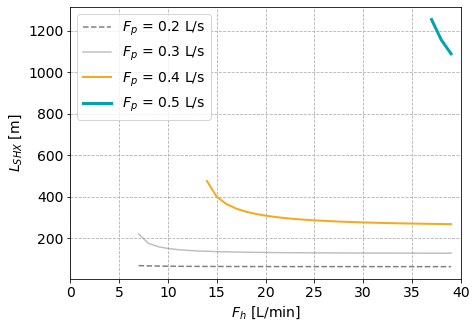

In [5]:
fig, ax = plt.subplots(figsize = (7,5))
flow_lps_02 = result_df.loc[(result_df.pond_flow_lps == 0.2)&(result_df.L_SHX_m > 0)]
flow_lps_03 = result_df.loc[(result_df.pond_flow_lps == 0.3)&(result_df.L_SHX_m > 0)]
flow_lps_04 = result_df.loc[(result_df.pond_flow_lps == 0.4)&(result_df.L_SHX_m > 0)]
flow_lps_05 = result_df.loc[(result_df.pond_flow_lps == 0.5)&(result_df.L_SHX_m > 0)]

plt.plot(flow_lps_02.hydronic_flow_lpm,flow_lps_02.L_SHX_m,label = '$F_{p}$ = 0.2 L/s',ls='--',color='grey')
plt.plot(flow_lps_03.hydronic_flow_lpm,flow_lps_03.L_SHX_m,label = '$F_{p}$ = 0.3 L/s',alpha = 0.5,color='grey')
plt.plot(flow_lps_04.hydronic_flow_lpm,flow_lps_04.L_SHX_m,label = '$F_{p}$ = 0.4 L/s',lw='2',color=step_gold)
plt.plot(flow_lps_05.hydronic_flow_lpm,flow_lps_05.L_SHX_m,label = '$F_{p}$ = 0.5 L/s',lw='3',color=step_blue)

ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.legend(fontsize=fsize)
ax.grid(ls='--')
ax.set_ylabel('$L_{SHX}$ [m]',fontsize=fsize)
ax.set_xlabel('$F_{h}$ [L/min]',fontsize=fsize)
ax.set_xlim(0,40)

As an initial estimate, with 230m of SHX and 183m of GHX, the system should be able to cool between 0.3 and 0.4 lps of stormwater from 30C to 24C if the ground temperature is 10C.

# 4 Import Data and Calculate Additional Parameters
Data is stored in a csv file. 

In [6]:
# Import from .csv
df = pd.read_csv("Geo_Pond_Master_09182019.csv",parse_dates=['Datetime'])
df.tail()

,Datetime,Flow_V,T_p1,T_p2,T_vair,T_h2,T_h1,Level_m,Amb_Temp_C,Sol_Wm2
34524,2019-09-18 09:54:00,0.8889,18.343,17.867,17.249,17.296,15.915,0.60446,18.913,385.6
34525,2019-09-18 09:59:00,0.8889,18.366,17.891,17.272,17.320,15.915,0.60447,19.555,404.4
34526,2019-09-18 10:04:00,0.8889,18.366,17.891,17.272,17.344,15.939,0.60431,19.175,423.1
34527,2019-09-18 10:09:00,0.8889,18.414,17.915,17.272,17.344,15.939,0.60426,18.937,438.1
34528,2019-09-18 10:14:00,0.8889,18.438,17.938,17.272,17.368,15.939,0.60416,18.866,453.1


Add calculated values to the dataframe.

In [7]:
# Add column for hydronic flowrate in gpm - equation from sensor calibration
df['Flow_h_gpm'] = [(x*8.273-2.6851) if (x*8.273-2.6851)>1 else 0 for x in df['Flow_V']]

# Add columne for hydronic flowrate in lpm
df['Flow_h_lpm'] = df.Flow_h_gpm * 3.785

# Add column for stormwater flowrate in gpm - equations from v-notch weir table
df['Flow_p_gpm'] = [((987.8*(x-(0.475))**2.5)*(1/3600)*(15850)).real for x in df['Level_m']]

# Add column for stormwater flowrate in lps
df['Flow_p_lps'] = df.Flow_p_gpm * 0.06309

# Add a column for cooling capacity using hydronic measurements
# Note specific heat capacity is 4186 J/(kgC), density is 1000 kg/m3, conversion of gpm to m3/s is 1/15850
df['Cap_h_kW'] = [(x-y)*z*(4186)*(1/15850) for x,y,z in zip(df['T_h2'],df['T_h1'],df['Flow_h_gpm'])]

# Add a column for cooling capacity using pond measurements
# Note specific heat capacity is 4186 J/(kgC), density is 1000 kg/m3, conversion of gpm to m3/s is 1/15850
df['Cap_p_kW'] = [(x-y)*z*(4186)*(1/15850) for x,y,z in zip(df['T_p1'],df['T_p2'],df['Flow_p_gpm'])]

# Add column for the required cooling to reduce the storm water temperature to 24oC
df['Cap_required_kW'] = [(x-24)*y*(4186)*(1/15850) if (x > 24) else 0 for x,y in zip(df['T_p1'],df['Flow_p_gpm'])]

Also need to add LMTD (Equation 3).

In [8]:
# Calculate LMTD    
# Assume constant average stormwater temperature
T_p_ave = (df.T_p1+df.T_p2)/2
T1 = T_p_ave - df.T_h2
T2 = T_p_ave - df.T_h1
lmtd_list = []
for T1_,T2_ in zip(T1,T2):
    try:
        lmtd = (T2_-T1_)/math.log(T2_/T1_)
    except: # get an exception if the ln argument is negative
        lmtd = -999 # Use to flag bad data
    lmtd_list.append(lmtd)
df['Lmtd_constant'] = lmtd_list 
df.head(100)


,Datetime,Flow_V,T_p1,T_p2,T_vair,T_h2,T_h1,Level_m,Amb_Temp_C,Sol_Wm2,Flow_h_gpm,Flow_h_lpm,Flow_p_gpm,Flow_p_lps,Cap_h_kW,Cap_p_kW,Cap_required_kW,Lmtd_constant
0,2019-05-21 12:55:00,0.8889,17.082222,15.676,14.122,16.939,13.834,0.5843,NaN,NaN,4.668770,17.671293,17.176956,1.083694,3.828547,6.379257,0.0,-999.000000
1,2019-05-21 13:00:00,0.8952,17.130000,15.748,14.218,17.296,13.954,0.5837,NaN,NaN,4.720890,17.868567,16.942194,1.068883,4.166777,6.183689,0.0,-999.000000
2,2019-05-21 13:05:00,0.8952,17.152778,15.819,14.194,17.439,13.858,0.5833,NaN,NaN,4.720890,17.868567,16.786762,1.059077,4.464760,5.913170,0.0,-999.000000
3,2019-05-21 13:10:00,0.8851,17.225000,15.867,14.409,17.605,13.858,0.5838,NaN,NaN,4.637332,17.552303,16.981186,1.071343,4.589040,6.090287,0.0,-999.000000
4,2019-05-21 13:15:00,0.8952,17.272222,15.891,14.505,17.272,13.954,0.5837,NaN,NaN,4.720890,17.868567,16.942194,1.068883,4.136854,6.180209,0.0,-999.000000
5,2019-05-21 13:20:00,0.8851,17.367778,15.915,14.529,17.463,14.026,0.5835,NaN,NaN,4.637332,17.552303,16.864370,1.063973,4.209376,6.470521,0.0,-999.000000
6,2019-05-21 13:25:00,0.8939,17.415000,15.963,14.409,17.534,14.026,0.5835,NaN,NaN,4.710135,17.827860,16.864370,1.063973,4.363780,6.467057,0.0,-999.000000
7,2019-05-21 13:30:00,0.8939,17.486111,16.034,14.577,17.582,14.098,0.5840,NaN,NaN,4.710135,17.827860,17.059332,1.076273,4.333925,6.542321,0.0,-999.000000
8,2019-05-21 13:35:00,0.8939,17.557778,16.106,14.649,17.534,14.074,0.5832,NaN,NaN,4.710135,17.827860,16.748038,1.056634,4.304071,6.421464,0.0,-999.000000
9,2019-05-21 13:40:00,0.8851,17.605000,16.153,14.553,17.605,14.122,0.5842,NaN,NaN,4.637332,17.552303,17.137694,1.081217,4.265713,6.571870,0.0,-999.000000


# 5 Calculate Borehole Thermal Resistance
Data was used after a ground temperature measurement was taken once the system entered a steady-state. The ground temperature measurement was 13.6 oC. Data from 2019-07-11 00:03:29 to 2019-07-11 10:34:00 was used.

In [9]:
# Grab data
RGHX_strt = datetime.strptime('07-11-2019 03:29', '%m-%d-%Y %H:%M')
RGHX_end = datetime.strptime('07-11-2019 10:34', '%m-%d-%Y %H:%M')
df_RGHX = df.loc[(df.Datetime >= RGHX_strt) & (df.Datetime <= RGHX_end)]
df_RGHX['(Th1+Th2)/2-Tg'] = (df_RGHX.T_h1 + df_RGHX.T_h2)/2 - 13.6
df_RGHX

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Datetime,Flow_V,T_p1,T_p2,T_vair,T_h2,T_h1,Level_m,Amb_Temp_C,Sol_Wm2,Flow_h_gpm,Flow_h_lpm,Flow_p_gpm,Flow_p_lps,Cap_h_kW,Cap_p_kW,Cap_required_kW,Lmtd_constant,(Th1+Th2)/2-Tg
14575,2019-07-11 03:29:00,0.8700,26.671,23.232,24.026,22.250,17.582,0.55254,20.222,0.6,4.512410,17.079472,7.281323,0.459379,5.563004,6.613212,5.136344,4.651521,6.3160
14576,2019-07-11 03:34:00,0.8548,26.598,23.208,24.050,22.250,17.582,0.55272,20.222,0.6,4.386660,16.603510,7.323653,0.462049,5.407977,6.556883,5.025009,4.598762,6.3160
14577,2019-07-11 03:39:00,0.8687,26.646,23.208,24.050,22.250,17.582,0.55275,20.246,0.6,4.501655,17.038765,7.330723,0.462495,5.549745,6.656143,5.122790,4.624882,6.3160
14578,2019-07-11 03:44:00,0.8561,26.646,23.208,24.050,22.226,17.582,0.55286,20.484,0.6,4.397415,16.644217,7.356679,0.464133,5.393363,6.679710,5.140929,4.642154,6.3040
14579,2019-07-11 03:49:00,0.8548,26.622,23.184,24.026,22.226,17.582,0.55287,20.531,0.6,4.386660,16.603510,7.359041,0.464282,5.380172,6.681855,5.095935,4.616072,6.3040
14580,2019-07-11 03:54:00,0.8700,26.598,23.184,24.050,22.202,17.582,0.55302,20.484,0.6,4.512410,17.079472,7.394531,0.466521,5.505801,6.667210,5.073641,4.620291,6.2920
14581,2019-07-11 03:59:00,0.8700,26.573,23.184,24.026,22.202,17.582,0.55290,20.484,0.6,4.512410,17.079472,7.366131,0.464729,5.505801,6.592968,5.005520,4.606711,6.2920
14582,2019-07-11 04:04:00,0.8700,26.549,23.160,23.978,22.178,17.582,0.55294,20.555,0.6,4.512410,17.079472,7.375590,0.465326,5.477199,6.601434,4.965198,4.597884,6.2800
14583,2019-07-11 04:09:00,0.8687,26.549,23.160,24.026,22.178,17.582,0.55289,20.603,0.6,4.501655,17.038765,7.363767,0.464580,5.464145,6.590852,4.957239,4.597884,6.2800
14584,2019-07-11 04:14:00,0.8800,26.549,23.136,24.002,22.178,17.582,0.55301,20.579,0.6,4.595140,17.392605,7.392162,0.466372,5.577617,6.663121,4.976354,4.584848,6.2800


Plot and fit the data.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


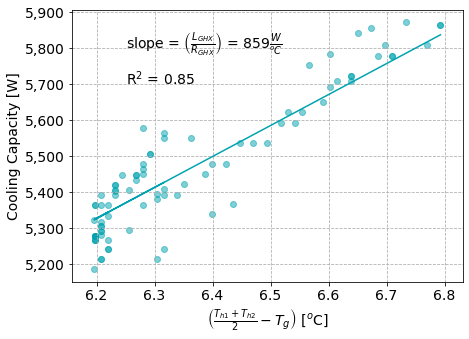

In [10]:
# Find the slope to determine R_GHX
x = df_RGHX['(Th1+Th2)/2-Tg']
y = df_RGHX['Cap_h_kW']*1000
x = x[:,np.newaxis]
a, resid, _, _ = np.linalg.lstsq(x, y)
r2 = 1 - resid / (y.size * y.var())

# Visualize the data
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x,y,alpha=0.5,color=step_blue)
ax.plot(x, a*x, color=step_blue)
ax.grid(ls='--')
ax.set_ylabel('Cooling Capacity [W]',fontsize=fsize)
ax.set_xlabel(r'$\left( \frac{T_{h1}+T_{h2}}{2} - T_{g} \right)$ [$^{o}$C]',fontsize=fsize)
txt1 = 'slope = ' + r'$\left( \frac{L_{GHX}}{R_{GHX}} \right)$ = ' + str(int(a[0])) + r'$ \frac{W}{^{o}C}}$' 
txt2 = r'R$^{2}$ = ' + str(round(r2[0],2)) # + r'\n R$^{2}$ = ' + str(r2[0])
ax.annotate(txt1,xy=(6.25,5800),xycoords='data',fontsize = fsize)
ax.annotate(txt2,xy=(6.25,5700),xycoords='data', fontsize = fsize)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)


In [11]:
# Calulate R_GHX
L_GHX = 183 # Borehole depth
R_GHX = L_GHX/a[0]
R_GHX

0.21299139710460863

# 6 Calculate SHX Thermal Resistance

For the SHX calculation, we can use almost all the data (unlike the for R_GHX). However, we do need to filter out data where the system was shut-off. Can do that both by date and by looking at the hydronic flowrate through the system. That is done below.

In [12]:
#Delete data that shouldn't be used for the RSHX calculation
#Issues:
# - the system has gone off briefly due to a fault and the data is bad for a bit of time after it comes back on because it is not in a steady-state
# - once the flow gets low enough the outflow temp sensor seems to be reading the vault air temperature
# - the system was periodically turned off for ground temperature measurements 

# Define dates where data will not be considered for R_SHX calc
start_date1 = datetime.strptime('5/27/2019 14:40', "%m/%d/%Y %H:%M") #First ground loop temp test
stop_date1 = datetime.strptime('5/28/2019 16:35', "%m/%d/%Y %H:%M")

start_date2 = datetime.strptime('6/21/2019 9:34', "%m/%d/%Y %H:%M")
stop_date2 = datetime.strptime('6/21/2019 16:34', "%m/%d/%Y %H:%M")

start_date3 = datetime.strptime('7/10/2019 15:19', "%m/%d/%Y %H:%M") #Flow got low and outflow temps not correct
stop_date3 = datetime.strptime('7/10/2019 18:19', "%m/%d/%Y %H:%M")

start_date4 = datetime.strptime('7/10/2019 12:44', "%m/%d/%Y %H:%M") #Flow got low and outflow temps not correct
stop_date4 = datetime.strptime('7/13/2019 17:44', "%m/%d/%Y %H:%M")  

start_date5 = datetime.strptime('7/01/2019 00:00', "%m/%d/%Y %H:%M") #During this period pump was off 
stop_date5 = datetime.strptime('7/08/2019 00:00', "%m/%d/%Y %H:%M")

start_date6 = datetime.strptime('7/30/2019 14:34', "%m/%d/%Y %H:%M") #Second ground loop temp test
stop_date6 = datetime.strptime('8/2/2019 14:59', "%m/%d/%Y %H:%M")

start_date7 = datetime.strptime('8/30/2019 11:00', "%m/%d/%Y %H:%M") 
stop_date7 = datetime.strptime('8/30/2019 14:00', "%m/%d/%Y %H:%M")

df_RSHX = df.copy(deep=True)

# Append to a list all indexes for data to be dropped 
index_to_drop = []
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date1) and (y <= stop_date1):
        index_to_drop.append(x)
        
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date2) and (y <= stop_date2):
        index_to_drop.append(x)
        
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date3) and (y <= stop_date3):
        index_to_drop.append(x)
        
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date4) and (y <= stop_date4):
        index_to_drop.append(x)

for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date5) and (y <= stop_date5):
        index_to_drop.append(x)
        
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date6) and (y <= stop_date6):
        index_to_drop.append(x)
        
for x,y in zip(df_RSHX.index,df_RSHX['Datetime']):
    if (y >= start_date7) and (y <= stop_date7):
        index_to_drop.append(x)

for x,y in zip(df_RSHX.index,df_RSHX['Flow_p_gpm']): #Pond flow very low
    if np.isnan(y):
        index_to_drop.append(x)  
    if y < 2:
        index_to_drop.append(x) 

for x,y in zip(df_RSHX.index,df_RSHX['Flow_h_gpm']): #Pump off or unrealistically high (because SHX was bypassed)
    if (y < 1.5) or (y > 6):
        index_to_drop.append(x)   
        
for x,y in zip(df_RSHX.index,df_RSHX['Lmtd_constant']): 
    if (y < 0):
        index_to_drop.append(x)

# Drop the data        
df_RSHX = df_RSHX.drop(index_to_drop, axis = 0) 

# Have a look
df_RSHX.head(10)

,Datetime,Flow_V,T_p1,T_p2,T_vair,T_h2,T_h1,Level_m,Amb_Temp_C,Sol_Wm2,Flow_h_gpm,Flow_h_lpm,Flow_p_gpm,Flow_p_lps,Cap_h_kW,Cap_p_kW,Cap_required_kW,Lmtd_constant
13,2019-05-21 14:00:00,0.8750,17.842778,16.344,14.649,16.701,13.762,0.5843,NaN,NaN,4.553775,17.236038,17.176956,1.083694,3.534607,6.799131,0.0,1.374076
14,2019-05-21 14:05:00,0.8851,17.915000,16.439,14.601,16.606,13.810,0.5840,NaN,NaN,4.637332,17.552303,17.059332,1.076273,3.424328,6.649950,0.0,1.575754
15,2019-05-21 14:10:00,0.8851,17.986111,16.463,14.792,16.582,13.858,0.5844,NaN,NaN,4.637332,17.552303,17.216271,1.086175,3.336148,6.925333,0.0,1.644737
16,2019-05-21 14:15:00,0.8851,18.032778,16.511,14.960,16.511,13.834,0.5846,NaN,NaN,4.637332,17.552303,17.295064,1.091146,3.278586,6.950937,0.0,1.775051
17,2019-05-21 14:20:00,0.8750,18.105000,16.558,14.960,16.534,13.858,0.5832,NaN,NaN,4.553775,17.236038,16.748038,1.056634,3.218308,6.842648,0.0,1.818631
18,2019-05-21 14:25:00,0.8952,18.128889,16.654,15.127,16.534,13.858,0.5846,NaN,NaN,4.720890,17.868567,17.295064,1.091146,3.336414,6.736766,0.0,1.889734
19,2019-05-21 14:30:00,0.8952,18.176111,16.630,15.055,16.511,13.858,0.5839,NaN,NaN,4.720890,17.868567,17.020232,1.073806,3.307738,6.949861,0.0,1.922769
20,2019-05-21 14:35:00,0.8876,18.223889,16.701,15.031,16.606,13.930,0.5836,NaN,NaN,4.658015,17.630586,16.903255,1.066426,3.291978,6.798428,0.0,1.888556
21,2019-05-21 14:40:00,0.8750,18.223889,16.773,14.912,16.630,13.930,0.5831,NaN,NaN,4.553775,17.236038,16.709368,1.054194,3.247172,6.402714,0.0,1.910583
22,2019-05-21 14:45:00,0.8851,18.247222,16.820,15.055,16.630,13.930,0.5829,NaN,NaN,4.637332,17.552303,16.632189,1.049325,3.306754,6.269183,0.0,1.951865


Plot the data and determine R_SHX from the slope of cooling capacity vs. LMTD.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


R_SHX in high hydronic flow condtions is 0.16880071495558718
R_SHX in low hydronic flow condtions is 0.20163201317329799


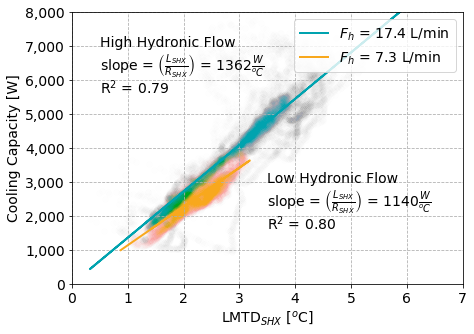

In [83]:
# Define two hydronic flow regime - high and low - and create separat dataframes
df_RSHX_highflow = df_RSHX.loc[df_RSHX.Flow_h_gpm > 3]
df_RSHX_lowflow = df_RSHX.loc[df_RSHX.Flow_h_gpm < 3]

# Define SHX length
L_SHX = 230

# Perform linear regression and plot highflow regime
fig, ax = plt.subplots(figsize=(7,5))
x = df_RSHX_highflow['Lmtd_constant']
y = df_RSHX_highflow.Cap_h_kW*1000
x = x[:,np.newaxis]
a, resid, _, _ = np.linalg.lstsq(x, y)
r2 = 1 - resid / (y.size * y.var())
txt1 = 'slope = ' + r'$\left( \frac{L_{SHX}}{R_{SHX}} \right)$ = ' + str(int(a[0])) + r'$ \frac{W}{^{o}C}}$' 
txt2 = r'R$^{2}$ = ' + str(r2[0])[:4] #
txt3 = r'High Hydronic Flow'
ax.annotate(txt1,xy=(0.5,6300),xycoords='data',fontsize = fsize)
ax.annotate(txt2,xy=(0.5,5600),xycoords='data', fontsize = fsize)
ax.annotate(txt3,xy=(0.5,7000),xycoords='data',fontsize = fsize)
ax.scatter(x,y,alpha=0.005,color=step_blue)
ax.plot(x, a*x, lw = 2, color=step_blue, label = r'$F_{h}$ = 17.4 L/min')

# Perform linear regression and plot low flow regime
x = df_RSHX_lowflow['Lmtd_constant']
y = df_RSHX_lowflow.Cap_h_kW*1000
x = x[:,np.newaxis]
w, resid, _, _ = np.linalg.lstsq(x, y)
r2 = 1 - resid / (y.size * y.var())
txt1 = 'slope = ' + r'$\left( \frac{L_{SHX}}{R_{SHX}} \right)$ = ' + str(int(w[0])) + r'$ \frac{W}{^{o}C}}$' 
txt2 = r'R$^{2}$ = ' + str(r2[0])[:4] # 
txt3 = r'Low Hydronic Flow'
ax.annotate(txt1,xy=(3.5,2300),xycoords='data',fontsize = fsize)
ax.annotate(txt2,xy=(3.5,1600),xycoords='data', fontsize = fsize)
ax.annotate(txt3,xy=(3.5,3000),xycoords='data',fontsize = fsize)
ax.scatter(x,y,alpha=0.005,color=step_gold)
ax.plot(x, w*x, lw = 2, color=step_gold, label = r'$F_{h}$ = 7.3 L/min') 

# Other plot code
ax.grid(ls='--')   
ax.set_ylim(0,8000)
ax.set_xlim(0,7)
ax.set_xlabel(r'LMTD$_{SHX}$ [$^{o}$C]',fontsize=fsize)
ax.set_ylabel('Cooling Capacity [W]',fontsize=fsize)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.legend(fontsize=fsize,loc=1)

# Print results
print('R_SHX in high hydronic flow condtions is ' + str(L_SHX/a[0]))
print('R_SHX in low hydronic flow condtions is ' + str(L_SHX/w[0]))
R_SHX_low = L_SHX/w[0]
R_SHX_high = L_SHX/a[0]


In [14]:
# Define a function that picks the right R_SHX value based on the hydronic flowrate
def R_SHX_func(flow_gpm):
    if flow_gpm > 3:
        return R_SHX_high
    else:
        return R_SHX_low    

# Test it out
R_SHX_func(2.4)  
    

0.2014011479883436

In [15]:
df_RSHX.loc[df_RSHX.Flow_h_gpm>3].Flow_h_lpm.mean()

17.37135471290943

In [16]:
df_RSHX.loc[df_RSHX.Flow_h_gpm<3].Flow_h_lpm.mean()

7.321571210277842

# 7 Calculate Ground Temperature
Calculate the ground temperature based on Equation 13/14. And compare to the ground tremperature model (Equation 16). Note that the model parameters were determined in a separate spreadsheet. However, the accuracy of the parameters is shown here by comparison against the calculated ground temperature.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


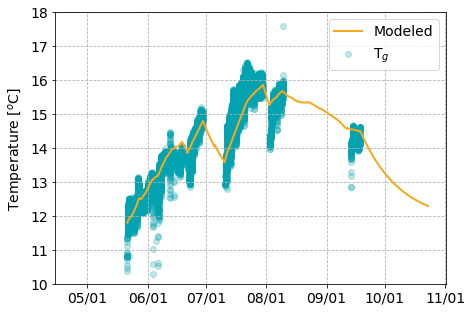

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(11, 17)

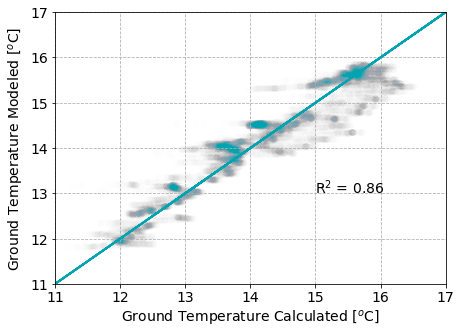

In [17]:
#Add column for calculated ground temp 
df['Tg_Calc'] = (df.T_h1 + df.T_h2)/2 - df.Cap_h_kW*1000*R_GHX/L_GHX

#The above equation only works if the system is in a steady-state
#It's not in a steady-state after stepwise changes to the hydronic flowrate
#This happens when the pump was turned off - or also when the SHX was bypassed
#Can determine if each data point is a steady-state data point by lookign at the past flowrate
Flow_h_gpm_list = df.Flow_h_gpm.to_list()
steady_state = []
for ind,flow in enumerate(Flow_h_gpm_list):
    try:
        if (Flow_h_gpm_list[ind-100]>0)&(Flow_h_gpm_list[ind-100]<6)&(flow > 3)&(flow < 6): #Check flowrate from 100 points ago (500min)
            steady_state.append('Yes')
        else:
            steady_state.append('No')
    except:
        steady_state.append('Yes') # Will only get error for first 100 points
df['Steady_State'] = steady_state

#Calculate modeled ground temp
Tg_modeled = [11.8]
for ind,cap in enumerate(df.Cap_h_kW*1000):
    if cap < 0: # Got "negative capacity" when SHX was shorted during one of the ground temp measurments because one sensor was no longer in flow path
        cap = 0
    new_Tg = Tg_modeled[ind] + (1.8e-7*cap) - 0.00017*(Tg_modeled[ind]-11.8) #Coeffcients were determined in an Excel sheet
    Tg_modeled.append(new_Tg)
df['Tg_Mod'] = Tg_modeled[1:]    
plt_df = df.loc[(df.Flow_h_gpm > 3)&(df.Flow_h_gpm < 6)&(df.Steady_State=='Yes')]   #Flowrate was greater than 6 when SHX was bypassed
                                                                                    #During this time T_h1 wasn't actually in flow path

#Want to plot modeled ground temp for into November to show the system settling to the ground temp
Tg_modeled_dates = df.Datetime.to_list()
start_add = Tg_modeled_dates[-1]
time_add = np.arange(0,10000,1)
for i in time_add:
    Tg_modeled_dates.append((i+1)*timedelta(minutes=5)+start_add)
    Tg_modeled.append(Tg_modeled[-1]-0.00017*(Tg_modeled[-1]-11.8))
Tg_modeled = Tg_modeled[1:]    
    
#Visualize Ground Temps as a time series
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.scatter(plt_df.Datetime,plt_df.Tg_Calc, color = step_blue, alpha=0.25, label = r'T$_{g}$')
l2 = ax.plot(Tg_modeled_dates,Tg_modeled, color = step_gold, label = r'Modeled', lw=2)
ax.set_ylabel('Temperature [$^{o}$C]',fontsize=fsize)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(fontsize=fsize)
ax.grid(ls='--')
ax.set_ylim(10,18)
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
plt.show()

#Plot Calculated against modeled
fig, ax = plt.subplots(figsize = (7,5))
x = plt_df.Tg_Calc
y = plt_df.Tg_Mod
x = x[:,np.newaxis]
a, resid, _, _ = np.linalg.lstsq(x, y)
r2 = 1 - resid / (y.size * y.var())
txt = r'R$^{2}$ = ' + str(round(r2[0],2)) 
ax.annotate(txt,xy=(15,13),xycoords='data',fontsize = fsize)
ax.scatter(x,y,alpha=0.005,color=step_blue)
ax.plot(x, a*x, lw = 2, color=step_blue) 
ax.set_ylabel('Ground Temperature Modeled [$^{o}$C]',fontsize=fsize)
ax.set_xlabel('Ground Temperature Calculated [$^{o}$C]',fontsize=fsize)
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.set_xlim(11,17)
ax.set_ylim(11,17)

# 8 Visualize Capacity and Temperature Change 

Start by just comparing the cooling capacity measured from the pond measurements versus that from the hydronic measurements. Perfect agreement is not expected. The vault sidewalls and floor are contributing to cooling and it is difficult to quantify. It would impact the pond measurements but not the hydronic measurements. The stormwater may also not be fully mixed while the hydronic cicuit would be. It is a therefore a high-level check.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


(0, 12)

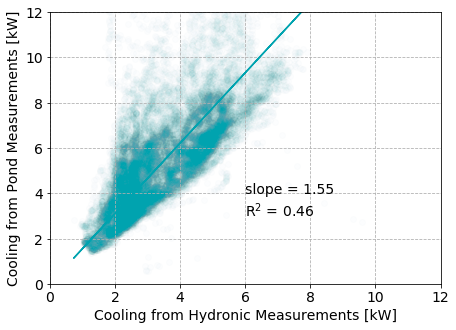

In [18]:
# Compare pond and hydronic cooling capacities
x = df_RSHX.Cap_h_kW
y = df_RSHX.Cap_p_kW
x = x[:,np.newaxis]
a, resid, _, _ = np.linalg.lstsq(x, y)
r2 = 1 - resid / (y.size * y.var())
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x,y,alpha=0.01,color=step_blue)
ax.plot(x, a*x, color=step_blue)
ax.grid(ls='--')
ax.set_xlabel('Cooling from Hydronic Measurements [kW]',fontsize=fsize)
ax.set_ylabel('Cooling from Pond Measurements [kW]',fontsize=fsize)
txt1 = 'slope = ' + str(round(a[0],2))  
txt2 = r'R$^{2}$ = ' + str(round(r2[0],2)) 
ax.annotate(txt1,xy=(6,4),xycoords='data',fontsize = fsize)
ax.annotate(txt2,xy=(6,3),xycoords='data', fontsize = fsize)
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.set_xlim(0,12)
ax.set_ylim(0,12)


Create Figure 7 in the article.

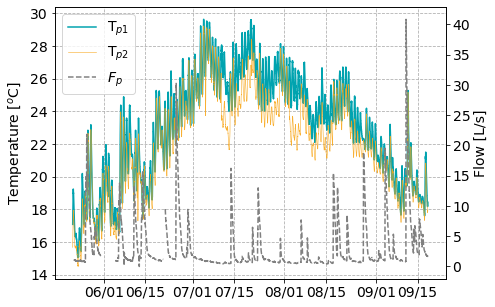

In [19]:
# Visualize
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(df['Datetime'],df['T_p1'], label = 'T$_{p1}$', color=step_blue,alpha=1,lw=1.5)
l2 = ax.plot(df['Datetime'],df['T_p2'], label = 'T$_{p2}$', color =step_gold,alpha=0.9,lw=0.6)
plt.ylabel('Temperature [$^{o}$C]',fontsize=fsize)
plt.legend()
ax2 = ax.twinx()
l3 = ax2.plot(df['Datetime'],df['Flow_p_lps'], color = 'grey', label = '$F_{p}$',ls='--')
ax.xaxis.set_major_formatter(myFmt)
plt.ylabel('Flow [L/s]',fontsize=fsize)
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 2,fontsize=fsize)
labels = [datetime.strptime('05/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('06/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('06/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('08/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('08/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('09/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('09/15/2019 00:00', "%m/%d/%Y %H:%M"),
         ]
plt.xticks(labels,['05/15','06/01','06/15','07/01','07/15','08/01','08/15','09/01','09/15'])
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax2.tick_params(axis='y',labelsize=fsize)
ax.grid(ls = '--')


Create Figure 8 in article.

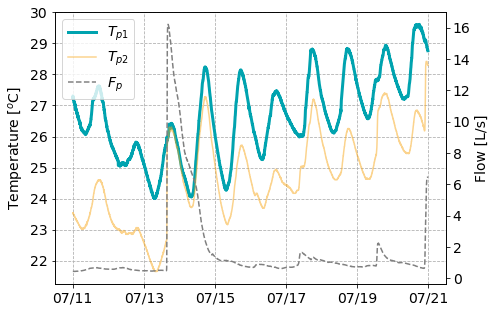

In [20]:
# Define date range
start_Fig8 = datetime.strptime('7/11/2019 00:00', "%m/%d/%Y %H:%M") 
stop_Fig8 = datetime.strptime('7/21/2019 00:00', "%m/%d/%Y %H:%M")

# Create a df for the plot with the desired date range
plt_df = df.loc[(df.Datetime > start_Fig8)&(df.Datetime < stop_Fig8)]

# Visualize
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(plt_df.Datetime,plt_df.T_p1, color = step_blue, label = r'$T_{p1}$',lw=3)
l2 = ax.plot(plt_df.Datetime,plt_df.T_p2, color = step_gold, label = r'$T_{p2}$',alpha=0.5)
plt.ylabel('Temperature [$^{o}$C]', fontsize=fsize)
ax2 = ax.twinx()
l4 = ax2.plot(plt_df.Datetime, plt_df.Flow_p_lps,ls='--',color = 'grey', label = '$F_{p}$')
ax2.xaxis.set_major_formatter(myFmt)
plt.ylabel('Flow [L/s]',fontsize=fsize)
lns = l1+l2+l4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 2,fontsize=fsize)
labels = [datetime.strptime('07/11/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/13/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/17/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/19/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/21/2019 00:00', "%m/%d/%Y %H:%M")]
plt.xticks(labels,['07/11','07/13','07/15','07/17','07/19','07/21'])
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax2.tick_params(axis='y',labelsize=fsize)


Create Figure 9 in the article.

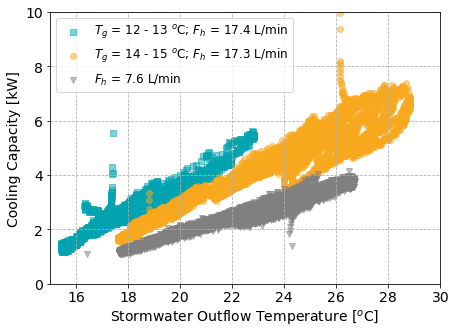

In [27]:
#Create sub dataframes for different hydronic flowrates and ground temps
low_Tg = df.loc[(df['Tg_Mod']>12)&(df['Tg_Mod']<13)&(df['Flow_h_gpm']>4)&(df['Cap_h_kW']>1)]
high_Tg = df.loc[(df['Tg_Mod']>14)&(df['Tg_Mod']<15)&(df['Flow_h_gpm']>4)&(df['Cap_h_kW']>1)]
low_flow = df.loc[(df['Flow_h_gpm']<3)&(df['Cap_h_kW']>1)]

#Visualize
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(low_Tg.T_p1,low_Tg.Cap_h_kW,color=step_blue,alpha=0.5,label='$T_{g}$ = 12 - 13 $^{o}$C; $F_{h}$ = 17.4 L/min',marker ='s')
ax.scatter(high_Tg.T_p1,high_Tg.Cap_h_kW,color=step_gold,alpha=0.5, label='$T_{g}$ = 14 - 15 $^{o}$C; $F_{h}$ = 17.3 L/min',marker ='o')
ax.scatter(low_flow.T_p1,low_flow.Cap_h_kW,color='grey',alpha=0.5, label='$F_{h}$ = 7.6 L/min',marker ='v')
ax.grid(ls='--')
plt.legend(fontsize=12)
ax.set_ylim(0,10)
ax.set_xlim(15,30)
ax.set_xlabel(r'Stormwater Outflow Temperature [$^{o}$C]',fontsize=fsize)
ax.set_ylabel('Cooling Capacity [kW]',fontsize=fsize)
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)

In [23]:
# Average flow for low_Tg
low_Tg.Flow_h_lpm.mean()

17.50490579838619

In [24]:
# Average flow for high_Tg
high_Tg.Flow_h_lpm.mean()

17.22413431051235

In [28]:
# Average flow for low_flow
low_flow.Flow_h_lpm.mean()

7.322109989274872

Create Figure 10 in the article.

Text(0, 0.5, 'Relative Frequency')

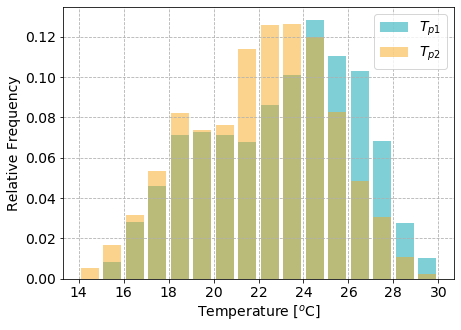

In [29]:
# Visualize
fig, ax = plt.subplots(figsize = (7,5))
temp_bins = [14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.hist(df['T_p1'],temp_bins,color = step_blue,alpha = 0.5,rwidth = 0.8,density = True, label = '$T_{p1}$')
plt.hist(df['T_p2'],temp_bins,color = step_gold,alpha = 0.5,rwidth = 0.8, density = True, label = '$T_{p2}$')
plt.legend(fontsize = fsize)
plt.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
plt.xlabel('Temperature [$^{o}$C]', fontsize = fsize)
plt.ylabel('Relative Frequency', fontsize = fsize)

Create Figure 11 in the article.

Text(0, 0.5, 'Relative Frequency')

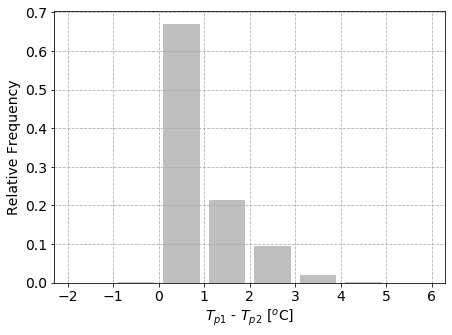

In [30]:
# Visualize
fig, ax = plt.subplots(figsize = (7,5))
temp_bins= [-2,-1,0,1,2,3,4,5,6]
plt.hist(df['T_p1']-df['T_p2'], temp_bins,rwidth = 0.8, color = 'grey', alpha = 0.5,density = True)
plt.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
plt.xlabel('$T_{p1}$ - $T_{p2}$ [$^{o}$C]', fontsize = fsize)
plt.ylabel('Relative Frequency', fontsize = fsize)

Create Figure 12 in the article.

Text(0, 0.5, 'Temperature [$^{o}$C]')

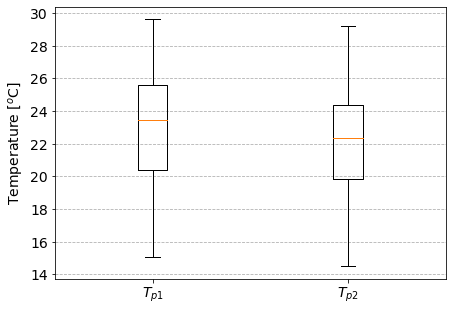

In [31]:
#Visualize
fig, ax = plt.subplots(figsize = (7,5))
plt.boxplot(df['T_p1'], positions = [1])
plt.boxplot(df['T_p2'], positions = [2])
plt.grid(ls='--', axis = 'y')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.set_xticklabels(['$T_{p1}$','$T_{p2}$'])
plt.ylabel('Temperature [$^{o}$C]', fontsize = 14)

# 9 Define Model and Apply to Monitoring Data
Geothermal system model is below.

In [32]:
# Geothermal system model to predict downstream stormwater temperature
def predicted(T_g,T_p1,flow_p,flow_h,R_swhe,R_bore, L_bore,L_swhe):        
    # Model constants
    rho_p = 1000 # kg /m3; Density of water
    cap_p = 4186 # J / (Kg C); Specific heat capacity of stormwater
    rho_h = 1000 # kg /m3; Density of hydronic system heat transfer fluid
    cap_h = 4186 # J / (Kg C); Specific heat capacity of hydronic system heat transfer fluid
    
    # Convert gpm values to m3/s
    flow_p = flow_p/15850
    flow_h = flow_h/15850

    # There is a point discontinuity of these terms are the same - so if they are the same make them slightly different
    if (rho_p * flow_p * cap_p) == (rho_h * flow_h * cap_h):
        flow_p = flow_p * 1.001  

    # Function that defines the heat transfer as a function of the pond outlet temperature and other set parameters
    def q(T_p2):
        q_ = rho_p * flow_p * cap_p * (T_p1 - T_p2)
        return q_

    # Function that defines the hydronic system return temperature to the borehole as a function of the pond outlet temperature and other set parameters
    def T_h2(T_p2):
        T_h2_ = q(T_p2) * R_bore / L_bore + q(T_p2)/(2 * rho_h * flow_h * cap_h) + T_g
        return T_h2_

    # Function that defines the hydronic system supply temperature to the borehole as a function of the pond outlet temperature and other set parameters
    def T_h1(T_p2):
        T_h1_ = T_h2(T_p2) - q(T_p2) / (rho_h * flow_h * cap_h)
        if T_h1_ > T_g: #supply can't be cooler than ground itself...
            T_h1_x = T_h1_
        else:
            T_h1_x = T_g
        return T_h1_x

    # Function for average pond temperature   
    def Tp_ave(T_p2):
        return (T_p2+T_p1)/2

    # Function to be solved numerically for the pond outflow temperature (T_p2) 
    def y(T_p2):
        ln_numer = Tp_ave(T_p2) - T_h1(T_p2)
        ln_denom = Tp_ave(T_p2) - T_h2(T_p2)
        rat_denom = Tp_ave(T_p2) - T_h1(T_p2) - (Tp_ave(T_p2) - T_h2(T_p2))
        try:
            y_ =  q(T_p2) * R_swhe * math.log(ln_numer/ln_denom)/rat_denom - L_swhe
        except:
            return(-1)
        return y_

    # This is the denominator of the natural logarithm expression in y; it will be used in this function to identify when the ln argument blows up to infinity
    def ln_den(T_p2):
        y = Tp_ave(T_p2) - T_h2(T_p2)
        return y

    # This is when the argument of the natural logarithm blows up to infinity - need to avoid in our numerical solution
    def blows_up():
        blown_up = optimize.fsolve(ln_den, 15)
        return blown_up    

    # Need to provide an initial point for the numerical solver but there are vertical asymptotes that need to be avoided - this function is used to avoid them
    def post_blw_up_factor():
        if (flow_h < 3/15850):
            factor = 0.01
        else:
            factor = 0.0005
        return factor  

    # Define the initial geuss for the numerical solver
    post_blowup = blows_up()+post_blw_up_factor()

    # Solve the equations   
    Tp2_C = optimize.fsolve(y, post_blowup) # Pond outflow temp  
    Th1_C = T_h1(Tp2_C) # Hydronic system supply temp to surface water heat exchanger
    Th2_C = T_h2(Tp2_C) # Hydronic system return temp to borehole
    Tpave_C = (Tp2_C + T_p1)/2
    q_ = q(Tp2_C) # Cooling power in units ton; 1 ton = 12,000 kBtu/hr and 3,412 kBtu/hr = 1 kW
    
    # Confirm result is actually a solution
    T1 = Tpave_C - Th2_C 
    T2 = Tpave_C - Th1_C
    confirmed_correct = False
    try:
        y_result = q_ * R_swhe * math.log(T1/T2)/(T1-T2) - L_swhe
    except:
        y_result = -999    
    if (y_result < 0.001)&(y_result > -0.001):
        confirmed_correct = True
    
    result = {'Tp2_C':Tp2_C,
              'Th1_C':Th1_C,
              'Th2_C':Th2_C,
              'q_W':q_,
              'y_result':y_result,
              'confirmed_correct':confirmed_correct}
    
    return result  

Apply to some example data.

In [33]:
# Example
predicted(T_g=10,T_p1=30,flow_p=10,flow_h=5,R_swhe=0.17,R_bore=0.21,L_bore=183,L_swhe=230)

{'Tp2_C': array([26.46052962]),
 'Th1_C': array([17.18748427]),
 'Th2_C': array([24.26642503]),
 'q_W': array([9347.77476486]),
 'y_result': array([1.8189894e-12]),
 'confirmed_correct': True}

The fact that "y_result" is essentially zero indicates that T_p2 is indeed a solution for the equations.

In [34]:
# Add ground temperature to the R_SHX dataframe, which we will use for the model comparison since it has filtered out
# most of the data where the system was off.
df_RSHX['Tg_Mod'] = [df.loc[df.Datetime == x].Tg_Mod.to_list()[0] for x in df_RSHX.Datetime]

In [35]:
# Predict the temperature downstream of the pond using the calibrated model
df_RSHX_Tp2_pred = []

for a,b,c,d in zip(df_RSHX.Tg_Mod,df_RSHX.T_p1,df_RSHX.Flow_p_gpm,df_RSHX.Flow_h_gpm):
    solution = predicted(T_g=a,T_p1=b,flow_p=c,flow_h=d,R_swhe=R_SHX_func(d),R_bore=0.21,L_bore=183,L_swhe=230)
    if solution['confirmed_correct'] == True:     
        df_RSHX_Tp2_pred.append(solution['Tp2_C'])
    else:
        df_RSHX_Tp2_pred.append(-999) # An error flag

df_RSHX['Tp2_pred_constant'] = df_RSHX_Tp2_pred 
df_RSHX = df_RSHX.loc[df_RSHX.Tp2_pred_constant>0] # Keep only those solutions where the results was confirmed as true

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


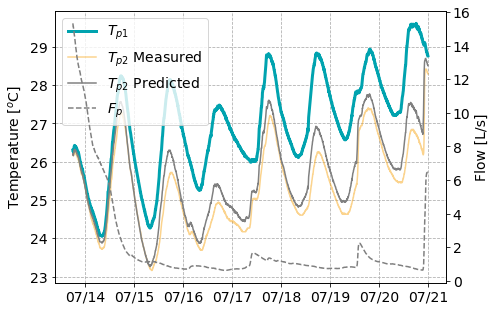

In [36]:
# Visualize the actual vs. predicted data over a short time period (10 days)
start_dt = datetime.strptime('7/11/2019 00:00', "%m/%d/%Y %H:%M") 
stop_dt = datetime.strptime('7/21/2019 00:00', "%m/%d/%Y %H:%M")
df_plt = df_RSHX.loc[(df_RSHX.Datetime > start_dt)&(df_RSHX.Datetime < stop_dt)]
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(df_plt.Datetime,df_plt.T_p1, color = step_blue, label = r'$T_{p1}$',lw=3)
l2 = ax.plot(df_plt.Datetime,df_plt.T_p2, color = step_gold, label = r'$T_{p2}$ Measured',alpha=0.5)
l3 = ax.plot(df_plt.Datetime,df_plt.Tp2_pred_constant, color = 'grey', label = r'$T_{p2}$ Predicted')
plt.ylabel('Temperature [$^{o}$C]', fontsize=fsize)
plt.legend(framealpha=0.5,fontsize=fsize)
ax2 = ax.twinx()
l4 = ax2.plot(df_plt.Datetime, df_plt.Flow_p_lps,ls='--',color = 'grey', label = '$F_{p}$')
ax.xaxis.set_major_formatter(myFmt)
plt.ylabel('Flow [L/s]',fontsize=fsize)
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 2,fontsize=fsize)
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax2.tick_params(axis='y',labelsize=fsize)


Text(0, 0.5, 'Modeled Stormwater Temp. Change [$^{o}$C]')

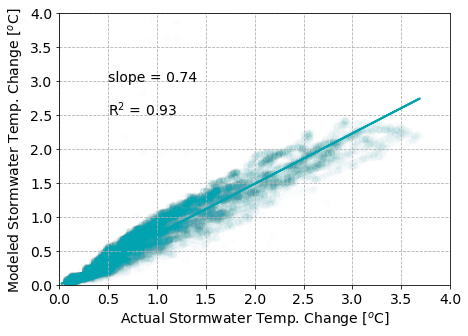

In [37]:
# Compare actual temperature change versus predicted temperature change
x = (df_RSHX.T_p1 - df_RSHX.T_p2)
x = x.astype(np.float64)
y = (df_RSHX.T_p1 - df_RSHX.Tp2_pred_constant)
y = y.astype(np.float64)
x = x[:,np.newaxis]
a, resid, _, _ = np.linalg.lstsq(x, y,rcond=-1)
r2 = 1 - resid / (y.size * y.var())
txt = r'R$^{2}$ = ' + str(round(r2[0],2)) 
txt2 = 'slope = ' + str(round(a[0],2)) 
fig, ax = plt.subplots(figsize = (7,5))
ax.annotate(txt,xy=(0.5,2.5),xycoords='data',fontsize = fsize)
ax.annotate(txt2,xy=(0.5,3.0),xycoords='data',fontsize = fsize)
ax.scatter(x,y,alpha=0.01,color=step_blue)
ax.plot(x, a*x, lw = 2, color=step_blue)
ax.set_ylim(0,4)
ax.set_xlim(0,4)
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.set_xlabel('Actual Stormwater Temp. Change [$^{o}$C]',fontsize=fsize)
ax.set_ylabel('Modeled Stormwater Temp. Change [$^{o}$C]',fontsize=fsize)


The modeled data is 26% lower than the actual data on average. Recall earlier than the hydronic and pond data didn't match up perfectly. This was believed to be large because of the vault, and overall, because measurements of temperature and flow in the hydronic system will be much better. The figure above agrees with that observation. The actual temperature change is lower than the modeled one because of other factors. 

# 10 Model Systems of Different Size
This section uses the calibrated model to consider different system sizes and find how often each can keep the outflow temperature below the target value.

In [38]:
# Create a dataframe where the T_p1 and Flow_p_gpm data is clean 
start = datetime.strptime('6/1/2019 00:00', "%m/%d/%Y %H:%M") 
stop = datetime.strptime('9/15/2019 00:00', "%m/%d/%Y %H:%M")
df_model = df.loc[(df.T_p1>0)&(df.Flow_p_gpm>0)&(df.Datetime>start)&(df.Datetime<stop)]

# Set systems size to consier
borehole_nums = [2,4,6,8,10,12]
percs = []
errors = []

# Model each system size to determine how frequently it keeps outflow temperatures within the target value
for borehole_num in borehole_nums:
    L_b = 183 * borehole_num
    L_s = 230 * borehole_num
    Tg = 11.8
    Tfar = 11.8
    q = 0
    new_Tp2 = []
    alpha = 0.00000018
    beta = 0.00017
    Tgs = []
    Temps = []
    qs = []
    error = 0    

    for temp, flow in zip(df_model.T_p1,df_model.Flow_p_gpm):
        Tg = Tg + (alpha * q / borehole_num) - (beta * (Tg-Tfar))
        Tgs.append(Tg)
        if temp > 24:
            result = predicted(T_g=Tg,T_p1=temp,flow_p=flow,flow_h=5,R_swhe=R_SHX_func(5),R_bore=0.21,L_bore=L_b,L_swhe=L_s)
            if result['confirmed_correct'] == True:
                T_p2 = result['Tp2_C']
                q = result['q_W']
            else:
                T_p2 = temp
                q = 0
                error = error + 1                
        else:
            T_p2 = temp
            q = 0
        Temps.append(T_p2)
        qs.append(q)  

    num_above = 0
    for temp in Temps:
        if temp > 24:
            num_above = num_above +1

    perc = (len(Temps)-num_above)/len(Temps)
    percs.append(perc)
    errors.append(error/len(df_model))    


In [39]:
# See errors where the model didn't produce a correct solution
# Not clear on why the model stuggles on some data points, but overall they represent an extremely a small subset
errors

[0.0, 0.0, 0.0, 0.0, 0.00037642871808911095, 0.007768119909657108]

In [40]:
# Add the fraction of time the system is below the target value with NO geothermal system
a = [0]
num_above = 0
for temp in df_model.T_p1:
    if temp > 24:
        num_above = num_above +1
b = [(len(df_model.T_p1)-num_above)/len(df_model.T_p1)]

borehole_nums = a + borehole_nums
percs = b + percs

(0.4, 0.99)

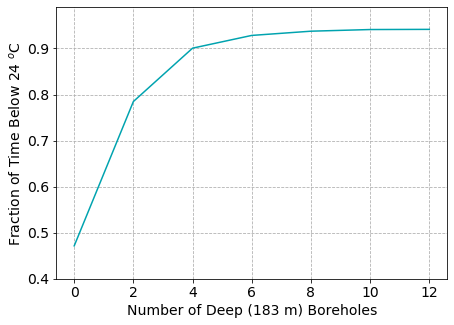

In [41]:
#Visualize the results
fig, ax = plt.subplots(figsize = (7,5))
ax.plot(borehole_nums,percs,color=step_blue)
ax.grid(ls='--')
ax.set_xlabel('Number of Deep (183 m) Boreholes', fontsize = fsize)
ax.set_ylabel('Fraction of Time Below 24 $^{o}$C', fontsize = fsize)
plt.savefig('system_sizing.png',transparent=True,dpi=1200)
#ax.set_ylim(0.5,1.05)
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax.set_ylim(0.4,0.99)

# 11 Model System With 6 Boreholes
This section uses the geothermal system model and the ground temperature model to visualize the outflow temperatures for a system consisting of 6 boreholes.

In [42]:
# Define initial parameters
borehole_num = 6
L_b = 183 * borehole_num
L_s = 230 * borehole_num
Tg = 11.8
Tfar = 11.8
q = 0
new_Tp2 = []
alpha = 0.00000018
beta = 0.00017

# Initialize lists where results will be kept
Tgs = []
Temps = []
qs = []
error = 0

# Model ground temp and outflow temperatures
for temp, flow in zip(df_model.T_p1,df_model.Flow_p_gpm):
    Tg = Tg + (alpha * q / borehole_num) - beta * (Tg-Tfar)
    Tgs.append(Tg)
    if temp > 24:
        result = predicted(T_g=Tg,T_p1=temp,flow_p=flow,flow_h=5,R_swhe=R_SHX_func(5),R_bore=0.21,L_bore=L_b,L_swhe=L_s)
        if result['confirmed_correct'] == True:
            T_p2 = result['Tp2_C']
            q = result['q_W']
        else:
            T_p2 = temp
            q = 0
            error = error + 1
    else:
        T_p2 = temp
        q = 0
    Temps.append(T_p2)
    qs.append(q) 
print('Errors: ' + str(error))

# Add results to a dataframe
temp_df  = pd.DataFrame({
    'Datetime':df_model.Datetime,
    'Flow_p_gpm':df_model.Flow_p_gpm,
    'T_p1':df_model.T_p1,
    'T_g':Tgs,
    'T_p2':Temps,
    'q':qs,
})

Errors: 0


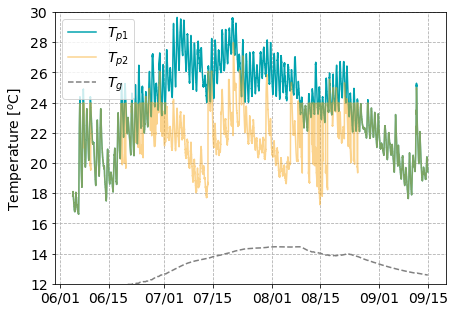

In [43]:
# Visualize the results
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(df_model.Datetime,df_model.T_p1, color = step_blue, label = r'$T_{p1}$')
l2 = ax.plot(df_model.Datetime,Temps, color = step_gold, label = r'$T_{p2}$',alpha=0.5)
l3 = ax.plot(df_model.Datetime,Tgs, color = 'grey', ls='--',label = r'$T_{g}$')
ax.set_ylabel('Temperature [$^{o}$C]',fontsize=fsize)
ax.xaxis.set_major_formatter(myFmt)
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 2, fontsize=fsize)
ax.grid(ls='--')
ax.set_ylim(12,30)
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
plt.show()

# 12 Required Cooling Capacity
Visualize the required coolign capacity showing the thermal load peaks (Figure 20).

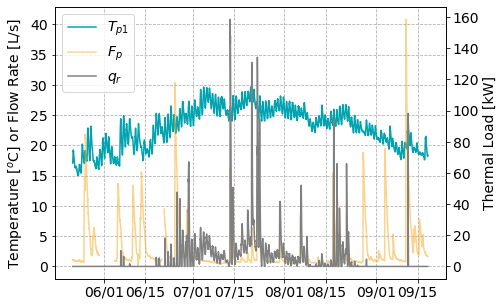

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(df['Datetime'],df['T_p1'], color = step_blue, label = r'$T_{p1}$')
l2 = ax.plot(df['Datetime'],df['Flow_p_lps'], color = step_gold, label = '$F_{p}$',alpha=0.5)
ax2 = ax.twinx()
l3 =  ax2.plot(df['Datetime'],df['Cap_required_kW'], color = 'grey', label = '$q_{r}$')
ax.set_ylabel('Temperature [$^{o}$C] or Flow Rate [L/s]', fontsize=fsize)
ax2.set_ylabel('Thermal Load [kW]', fontsize=fsize)
ax.xaxis.set_major_formatter(myFmt)
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2,fontsize=fsize)
labels = [datetime.strptime('06/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('06/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('07/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('08/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('08/15/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('09/01/2019 00:00', "%m/%d/%Y %H:%M"),
          datetime.strptime('09/15/2019 00:00', "%m/%d/%Y %H:%M"),
                  ]
plt.xticks(labels,['06/01','06/15','07/01','07/15','08/01','08/15','09/01','09/15'])
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax2.tick_params(axis='y',labelsize=fsize)

# 13 Temperature Change with No Geothermal System


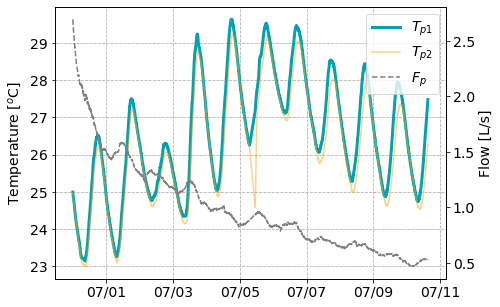

In [82]:
# Define dataframe where there is no hydronic flow
df_no_geo = df.loc[(df.Flow_h_lpm < 1.5)&(df.Level_m>0.55)]
start_dt = datetime.strptime('6/30/2019 00:00', "%m/%d/%Y %H:%M") 
stop_dt = datetime.strptime('7/21/2019 00:00', "%m/%d/%Y %H:%M")
df_plt = df_no_geo.loc[(df_no_geo.Datetime > start_dt)&(df_no_geo.Datetime < stop_dt)]

#Visualize
fig, ax = plt.subplots(figsize = (7,5))
l1 = ax.plot(df_plt.Datetime,df_plt.T_p1, color = step_blue, label = r'$T_{p1}$',lw=3)
l2 = ax.plot(df_plt.Datetime,df_plt.T_p2, color = step_gold, label = r'$T_{p2}$',alpha=0.5)
plt.ylabel('Temperature [$^{o}$C]', fontsize=fsize)
plt.legend(framealpha=0.5,fontsize=fsize)
ax2 = ax.twinx()
l3 = ax2.plot(df_plt.Datetime, df_plt.Flow_p_lps,color = 'grey', label = '$F_{p}$', ls='--')
ax.xaxis.set_major_formatter(myFmt)
plt.ylabel('Flow [L/s]',fontsize=fsize)
lns = l1+l2+l4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 1,fontsize=fsize)
ax.grid(ls='--')
ax.tick_params(axis='x',labelsize=fsize)
ax.tick_params(axis='y',labelsize=fsize)
ax2.tick_params(axis='y',labelsize=fsize)
